In [2]:
import pandas as pd
from datetime import timedelta
Accidentes_Aviones = pd.read_csv("AccidentesAviones.csv")

# EDA (Exploratory Data Analysis)

Antes de comenzar vamos a  modificar los nombres de las tablas para mayor entendimiento y perfomance

In [3]:
# Creamos un diccionario para hacer un mapeo con los nombres antiguos y sus nombres nuevos

Modificacion_Nombres = {
    'Unnamed: 0': 'Id',
    'fecha': 'Fecha',
    'HORA declarada': 'Hora_Declarada',
    'Ruta': 'Ubicacion',
    'OperadOR': 'Operador',
    'flight_no': 'Numero_de_Vuelo',
    'route': 'Ruta_del_Vuelo',
    'ac_type': 'Tipo_de_Aeronave',
    'registration': 'Registro',
    'cn_ln': 'Numero_de_Serie',
    'all_aboard': 'Total_Personas_a_Bordo',
    'PASAJEROS A BORDO': 'Pasajeros_a_Bordo',
    'crew_aboard': 'Tripulacion_a_Bordo',
    'cantidad de fallecidos': 'Total_Fallecidos',
    'passenger_fatalities': 'Fallecidos_Pasajeros',
    'crew_fatalities': 'Fallecidos_Tripulacion',
    'ground': 'Daños_en_Suelo',
    'summary': 'Resumen'
}

# Renombramos las columnas con el diccionario que hicimos

Accidentes_Aviones.rename(columns= Modificacion_Nombres, inplace=True)

## Busqueda de valores faltantes

Al explorar el DataFrame, hemos notado que se requiere una revisión de los tipos de datos en cada columna y que los valores nulos están representados como '?'. Por lo tanto, nuestro próximo paso es realizar dos acciones principales: primero, ajustar los tipos de datos en cada columna según sea necesario y, segundo, reemplazar los '?' por valores nulos o dejar los campos vacíos según corresponda."

Visualizamos si tiene nulos y que tipo de dato son cada columna

In [4]:
# Visualizamos el dataframe para ver que podemos modificar
Accidentes_Aviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5008 non-null   int64 
 1   Fecha                   5008 non-null   object
 2   Hora_Declarada          5008 non-null   object
 3   Ubicacion               5008 non-null   object
 4   Operador                5008 non-null   object
 5   Numero_de_Vuelo         5008 non-null   object
 6   Ruta_del_Vuelo          5007 non-null   object
 7   Tipo_de_Aeronave        5008 non-null   object
 8   Registro                5008 non-null   object
 9   Numero_de_Serie         5008 non-null   object
 10  Total_Personas_a_Bordo  5008 non-null   object
 11  Pasajeros_a_Bordo       5008 non-null   object
 12  Tripulacion_a_Bordo     5008 non-null   object
 13  Total_Fallecidos        5008 non-null   object
 14  Fallecidos_Pasajeros    5008 non-null   object
 15  Fall

Modificamos la columna "Fecha"

In [5]:
Accidentes_Aviones['Fecha'] = pd.to_datetime(Accidentes_Aviones['Fecha'])

Modificamos la columna "Hora_Declarada"

In [6]:
# Pasamos a string
Accidentes_Aviones['Hora_Declarada']= Accidentes_Aviones['Hora_Declarada'].astype(str)

In [7]:
#  Hacemos una columna "Horas" con los dos primeros digitos de la columna "Hora_Declarada"
Accidentes_Aviones['Horas'] = Accidentes_Aviones['Hora_Declarada'].str[:2]  

In [8]:
#  Hacemos una columna "Minutos" con los dos ultimos digitos de la columna "Hora_Declarada"
Accidentes_Aviones['Minutos'] = Accidentes_Aviones['Hora_Declarada'].str[2:]

In [9]:
# Combinamos las dos columnas 'Horas' y 'Minutos', y luego transformamos la columna 'Hora_Declarada' al formato datetime.
Accidentes_Aviones['Hora_Declarada'] = pd.to_datetime(Accidentes_Aviones['Horas'].astype(str) + ':' + Accidentes_Aviones['Minutos'].astype(str), format='%H:%M',errors='coerce').dt.time

In [10]:
# Borramos las columnas "Horas" y "Minutos", ya que no son necesarias
Accidentes_Aviones = Accidentes_Aviones.drop(columns=['Horas', 'Minutos'])

### Modificamos las columnas de tipo de dato numerico

In [11]:
# Hacemos una lista de las colunas que queremos pasar a tipo numerico
Columnas_int = ['Numero_de_Vuelo','Numero_de_Serie','Total_Personas_a_Bordo',"Pasajeros_a_Bordo","Tripulacion_a_Bordo","Total_Fallecidos","Fallecidos_Pasajeros","Fallecidos_Tripulacion","Daños_en_Suelo"]	
Accidentes_Aviones[Columnas_int] = Accidentes_Aviones[Columnas_int].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [12]:
# Ahora que las columnas estan tipo numericas pasamos todas a integer
for columna in Columnas_int:
    Accidentes_Aviones[columna] = Accidentes_Aviones[columna].astype(int)

In [13]:
# Todos lo valores restantes que contienen "?" los modificamos como nulos
import numpy as np
Accidentes_Aviones = Accidentes_Aviones.replace('?', "")

### Modificamos la columna "Ubicacion"

In [14]:
# Pasamos a string
Accidentes_Aviones['Ubicacion']= Accidentes_Aviones['Ubicacion'].astype(str)

In [15]:
# Hacemos una lista de paises
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"]

In [16]:
# Hacemos una funcion, que si un país coincide con el valor en la columna 'Ubicación', lo agregue como el país correspondiente; de lo contrario, lo clasifique como 'Otros'.
def obtener_pais(Ubicacion):
    for pais in lista_paises:
        if pais.lower() in Ubicacion.lower():
            return pais
    return 'otros'

In [17]:
# Utilizamos la funcion para cada fila del dataframe
Accidentes_Aviones['Pais'] = Accidentes_Aviones['Ubicacion'].apply(obtener_pais)

In [18]:
# Observamos que muchos de los valores corresponden a estados de los Estados Unidos

# Lista de estados de los Estados Unidos
Estados_USA = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

In [19]:
# Reemplazamos en  'Pais' el valor 'otros' por 'United States' si 'Pais' contiene un estado de los Estados Unidos
Accidentes_Aviones.loc[Accidentes_Aviones['Ubicacion'].str.contains('|'.join(Estados_USA), case=False, na=False), 'Pais'] = 'United States'

In [20]:
# Agrupamos los datos por país y sumamos la cantidad de accidentes
total_accidentes_por_pais = Accidentes_Aviones.groupby('Pais')['Fecha'].count()

In [49]:
top_10_paises = total_accidentes_por_pais.nlargest(10)
top_10_paises

Pais
United States    1037
otros             341
Russia            255
Brazil            176
Colombia          150
Canada            133
France            129
India             112
England           101
Indonesia          99
Name: Fecha, dtype: int64

### Modificamos la columna "Operador"

Creamos una nueva columna con aviones militares y no militares

In [22]:
# Si en la columna 'Operador' coincide con alguna de las palabras en la 'lista_palabras', 
# entonces se considera que se trata de aviones militares; de lo contrario aviones no militares." 

lista_palabras = ['Military', 'Air Force', 'Army']

# Busca cualquier palabra clave que exista en la lista
pattern = '|'.join(lista_palabras)

# Buscamos las coincidencia que tienen "lista_palabras" con la columna "Operador"
Accidentes_Aviones['Tipo_Avion'] = np.where(Accidentes_Aviones['Operador'].str.contains('|'.join(lista_palabras), case=False), 'militar', 'no-militar')


In [23]:
Accidentes_Aviones["Tipo_Avion"].value_counts()

Tipo_Avion
no-militar    4217
militar        791
Name: count, dtype: int64

### Modificamos Tipos_Aeronaves

In [24]:
# Hacemos una lista de las marcas de las aeronaves
marca = [
    "Boeing 747",
    "Airbus A320",
    "Lockheed Martin F-35",
    "Bombardier Global 6000",
    "Embraer E175",
    "Gulfstream G650",
    "Cessna Citation X",
    "Dassault Falcon 7X",
    "Beechcraft King Air 350",
    "Piper PA-28 Cherokee",
    "Saab 340",
    "Sukhoi Su-30",
    "Antonov An-124 Ruslan",
    "McDonnell Douglas MD-80",
]

In [51]:
# Creamos una funcion,  si la lista "marca" coincide con el valor en la columna 'Tipo_de_Aeronave', lo incluirá en la columna; en caso contrario, será categorizado como 'Otros'."
def Marca_aeronave(Tipo_de_Aeronave):
    for i in marca:
        if any(word.lower() in Tipo_de_Aeronave.lower().split() for word in i.split()):
            return i
    return 'Otros'


In [52]:
# Utilizamos la funcion para cada fila del dataframe
Accidentes_Aviones["Marca_Avion"] = Accidentes_Aviones['Tipo_de_Aeronave'].apply(Marca_aeronave)

In [53]:
Marcas_Mas_Accidentes = Accidentes_Aviones.groupby("Marca_Avion")["Fecha"].count()
Marcas_Mas_Accidentes.nlargest(10)

Marca_Avion
Otros                      2546
McDonnell Douglas MD-80    1116
Boeing 747                  411
Lockheed Martin F-35        352
Antonov An-124 Ruslan       286
Cessna Citation X            72
Beechcraft King Air 350      67
Embraer E175                 60
Airbus A320                  45
Piper PA-28 Cherokee         24
Name: Fecha, dtype: int64

Personas Sobrevivientes

In [55]:
# Creamos una columna Sobrevivientes 
Accidentes_Aviones["Sobrevivientes"] = Accidentes_Aviones["Total_Personas_a_Bordo"] - Accidentes_Aviones["Total_Fallecidos"]

In [56]:
# Borramos columnas que no vamos a analizar 
Accidentes_Aviones.columns
Accidentes_Aviones.drop(columns= ['Resumen','Registro',"Año"])

,Fecha,Hora_Declarada,Ubicacion,Operador,Numero_de_Vuelo,Ruta_del_Vuelo,Tipo_de_Aeronave,Numero_de_Serie,Total_Personas_a_Bordo,Pasajeros_a_Bordo,Tripulacion_a_Bordo,Total_Fallecidos,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Daños_en_Suelo,Pais,Tipo_Avion,Marca_Avion,Sobrevivientes,Año
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,0,Demonstration,Wright Flyer III,1,2,1,1,1,1,0,0,United States,militar,Otros,1,1908
1,1909-09-07,NaT,"Juvisy-sur-Orge, France",,0,Air show,Wright Byplane,0,1,0,1,1,0,0,0,France,no-militar,Otros,0,1909
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,0,Test flight,Dirigible,0,5,0,5,5,0,5,0,United States,militar,Otros,0,1912
3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,0,,Curtiss seaplane,0,1,0,1,1,0,1,0,Canada,no-militar,Otros,0,1913
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,0,,Zeppelin L-1 (airship),0,20,0,0,14,0,0,0,otros,militar,Otros,6,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,0,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,4598,6,5,1,5,4,1,0,United States,no-militar,Otros,1,2021
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,0,,Beechcraft B300 King Air 350i,0,11,7,4,11,7,4,0,Nigeria,militar,Beechcraft King Air 350,0,2021
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,0,Naypyidaw - Anisakan,Beechcraft 1900D,0,14,12,2,12,11,1,0,Myanmar,militar,Beechcraft King Air 350,2,2021
5006,2021-07-04,NaT,"Patikul, Sulu, Philippines",Military - Philippine Air Force,0,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96,88,8,50,0,0,3,Philippines,militar,Lockheed Martin F-35,46,2021


Después de la transformación de datos y la modificación de tipos de datos, se identificaron muchos valores nulos en el dataframe. En lugar de eliminarlos y perder información importante, opté por mantenerlos como valores nulos para preservar la integridad de los datos.

## Valores atipicos (outliers)

Usamos un grafico de dispersion para ver los outliers que nos puede estar afectando a nuestros analisis y graficos. 

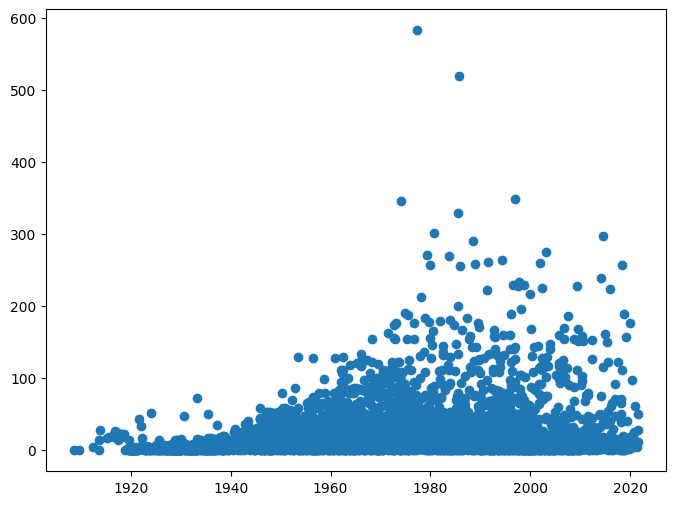

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(Accidentes_Aviones['Fecha'], Accidentes_Aviones['Total_Fallecidos'])

Observamos que cuando la cantidad de accidentes supera los 400, es posible que se presenten valores atípicos en la distribución de los datos.

Analizamos lo que ocurrió en los accidentes que tuvieron número de víctimas superior a 400.

In [31]:
Posibles_Outliers = Accidentes_Aviones[Accidentes_Aviones["Total_Fallecidos"]> 400]
Posibles_Outliers

,Id,Fecha,Hora_Declarada,Ubicacion,Operador,Numero_de_Vuelo,Ruta_del_Vuelo,Tipo_de_Aeronave,Registro,Numero_de_Serie,...,Tripulacion_a_Bordo,Total_Fallecidos,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Daños_en_Suelo,Resumen,Pais,Tipo_Avion,Marca_Avion,Sobrevivientes
2902,2902,1977-03-27,17:07:00,"Tenerife, Canary Islands",Pan American World Airways / KLM,0,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,0,...,30,583,560,23,0,Both aircraft were diverted to Tenerife becaus...,otros,no-militar,Boeing 747,61
3341,3341,1985-08-12,18:56:00,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,0,...,15,520,505,15,0,The aircraft suffered an aft pressure bulkhead...,Japan,no-militar,Boeing 747,4


El primer registro nos indica en la columna de resumen que la causa principal de más de 400 fallecidos fue una colisión entre dos aviones.

El segundo registro que encontré en internet coincide con los datos en mi dataframe por lo que es correcto.

Calculamos si existen outliers con el metodo de rango intercuartílico

In [57]:
# Calculamos el intercuartílico
Q1 = Accidentes_Aviones['Total_Fallecidos'].quantile(0.25)
Q3 = Accidentes_Aviones['Total_Fallecidos'].quantile(0.75)
IQR = Q3 - Q1

In [58]:
# Definimos los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [59]:
# Observamos si existe outliers
df_con_outliers = Accidentes_Aviones[(Accidentes_Aviones['Total_Fallecidos'] <= limite_inferior) & (Accidentes_Aviones['Total_Fallecidos'] >= limite_superior)]
df_con_outliers

,Id,Fecha,Hora_Declarada,Ubicacion,Operador,Numero_de_Vuelo,Ruta_del_Vuelo,Tipo_de_Aeronave,Registro,Numero_de_Serie,...,Total_Fallecidos,Fallecidos_Pasajeros,Fallecidos_Tripulacion,Daños_en_Suelo,Resumen,Pais,Tipo_Avion,Marca_Avion,Sobrevivientes,Año


Al utilizar un gráfico de dispersión y aplicar el método del rango intercuartílico, concluimos que no se encuentran valores atípicos (outliers) en la columna "Total_Fallecidos".

## Registros duplicados.

In [60]:
registros_duplicados = Accidentes_Aviones["Id"][Accidentes_Aviones["Id"].duplicated()]
registros_duplicados

Series([], Name: Id, dtype: int64)

No contiene datos duplicados el dataframe

### Usamos una grafica de linea con los totales fallecidos con la fecha , para ver cuales fueron sus mayores accidentes a lo largo del tiempo


<Axes: xlabel='Fecha', ylabel='Total_Fallecidos'>

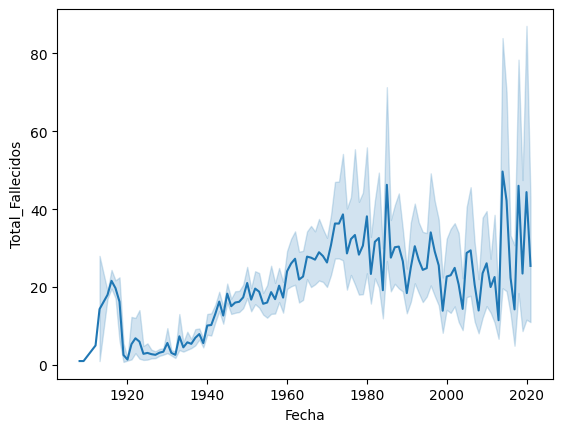

In [35]:
import seaborn as sns
Fecha_Año = Accidentes_Aviones['Fecha'].dt.year
sns.lineplot(x= Fecha_Año , y="Total_Fallecidos", data=Accidentes_Aviones) 

In [36]:
Accidentes_Aviones.columns

Index(['Id', 'Fecha', 'Hora_Declarada', 'Ubicacion', 'Operador',
       'Numero_de_Vuelo', 'Ruta_del_Vuelo', 'Tipo_de_Aeronave', 'Registro',
       'Numero_de_Serie', 'Total_Personas_a_Bordo', 'Pasajeros_a_Bordo',
       'Tripulacion_a_Bordo', 'Total_Fallecidos', 'Fallecidos_Pasajeros',
       'Fallecidos_Tripulacion', 'Daños_en_Suelo', 'Resumen', 'Pais',
       'Tipo_Avion', 'Marca_Avion', 'Sobrevivientes'],
      dtype='object')

In [37]:
Accidentes_Aviones["Total_Fallecidos"].describe()

count    5008.000000
mean       22.258387
std        34.983747
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: Total_Fallecidos, dtype: float64

In [38]:
Accidentes_Aviones.to_csv("Accidentes_Aviones.csv",index=False)

## KPI`S

### Tasa anual de mortalidad 

Tasa de Mortalidad = (Número de Muertes / Población Total) 

In [40]:
# Creamos una columna solamente por año
Accidentes_Aviones['Año'] = Accidentes_Aviones['Fecha'].dt.year

In [41]:
# Agrupamos por año
Fallecidos_por_Año = Accidentes_Aviones.groupby('Año').agg({'Total_Fallecidos': 'sum', 'Total_Personas_a_Bordo': 'sum'})

In [42]:
# Nuevo dataframe con tasa de mortalidad por año
Fallecidos_por_Año["Tasa_Mortalidad_Anual"] = Fallecidos_por_Año["Total_Fallecidos"] / Fallecidos_por_Año["Total_Personas_a_Bordo"]

In [43]:
Fallecidos_por_Año

,Total_Fallecidos,Total_Personas_a_Bordo,Tasa_Mortalidad_Anual
Año,,,
1908,1,2,0.500000
1909,1,1,1.000000
1912,5,5,1.000000
1913,43,49,0.877551
1915,36,60,0.600000
...,...,...,...
2017,214,245,0.873469
2018,874,1239,0.705408
2019,305,432,0.706019


<Axes: xlabel='Año', ylabel='Tasa_Mortalidad_Anual'>

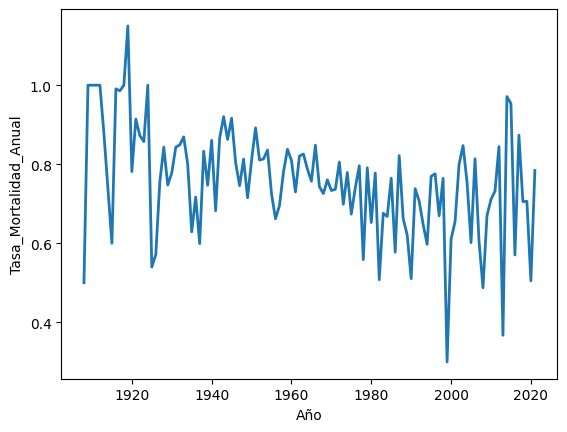

In [64]:
# Graficamos
sns.lineplot(data=Fallecidos_por_Año, x=Fallecidos_por_Año.index, y='Tasa_Mortalidad_Anual', linewidth=2, markers=False)

La gráfica indica que la tasa de mortalidad obtuvo una disminución notable desde la década de 1920 hasta alrededor del año 2000. Sin embargo, a partir del año 2000 y hasta el 2021, esta tasa se mantuvo estable sin mostrar una tendencia clara en ninguna dirección.

### Kpi 1 : Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior.

In [65]:
# Nuevo dataframe Mortalidad_tripulacion

Mortalidad_Tripulacion =  pd.DataFrame(Accidentes_Aviones.groupby('Año').agg({'Fallecidos_Tripulacion': 'sum', 'Tripulacion_a_Bordo': 'sum'}).reset_index())

In [66]:
# Agregamos la columna "Tasa_Mortalidad_Tripulacion"
Mortalidad_Tripulacion["Tasa_Mortalidad_Tripulacion"] = Mortalidad_Tripulacion["Fallecidos_Tripulacion"] / Mortalidad_Tripulacion["Tripulacion_a_Bordo"]

In [67]:
# Calculamos la tasa de fatalidad promedio para la última década (2010-2020)
tasa_fatalidad_ultima_decada = Mortalidad_Tripulacion[(Mortalidad_Tripulacion['Año'] >= 2010) & (Mortalidad_Tripulacion['Año'] <= 2020)]['Tasa_Mortalidad_Tripulacion'].mean()

# Calculamos la tasa de fatalidad promedio para la década anterior (2000-2010)
tasa_fatalidad_decada_anterior = Mortalidad_Tripulacion[(Mortalidad_Tripulacion['Año'] >= 2000) & (Mortalidad_Tripulacion['Año'] <= 2010)]['Tasa_Mortalidad_Tripulacion'].mean()

# Calcular la diferencia entre ambas tasas de fatalidad
diferencia_tasas = tasa_fatalidad_ultima_decada - tasa_fatalidad_decada_anterior

# Crear un DataFrame con los resultados
data = {'Década': ['2000-2010','2010-2020'],
        'Tasa de Fatalidad ': [tasa_fatalidad_decada_anterior,tasa_fatalidad_ultima_decada],
        'Diferencia de Tasas': [ None,diferencia_tasas]}

df_resultado = pd.DataFrame(data)
df_resultado


,Década,Tasa de Fatalidad,Diferencia de Tasas
0,2000-2010,0.784833,NaN
1,2010-2020,0.824477,0.039645


Se observa que la tasa de mortalidad de la tripulación no ha cumplido con el objetivo, ya que experimentó un aumento del 3.9% en comparación con la década anterior (2000-2010) con respecto a la última década (2010-2020).

### Kpi 2:  Media móvil de accidentes de aeronaves. Objetivo: mantenerse por debajo de la media

In [68]:
# Agrupamos por año y contamos la cantidad de accidentes
Accidentes_Año = Accidentes_Aviones.groupby('Año').size().reset_index(name='Cantidad de accidentes')

In [69]:
# Calculamos la media móvil de 10 sesiones con el parametro windows
Accidentes_Año['Media móvil'] = Accidentes_Año['Cantidad de accidentes'].rolling(window=10).mean()

<Axes: xlabel='Año', ylabel='Cantidad de accidentes'>

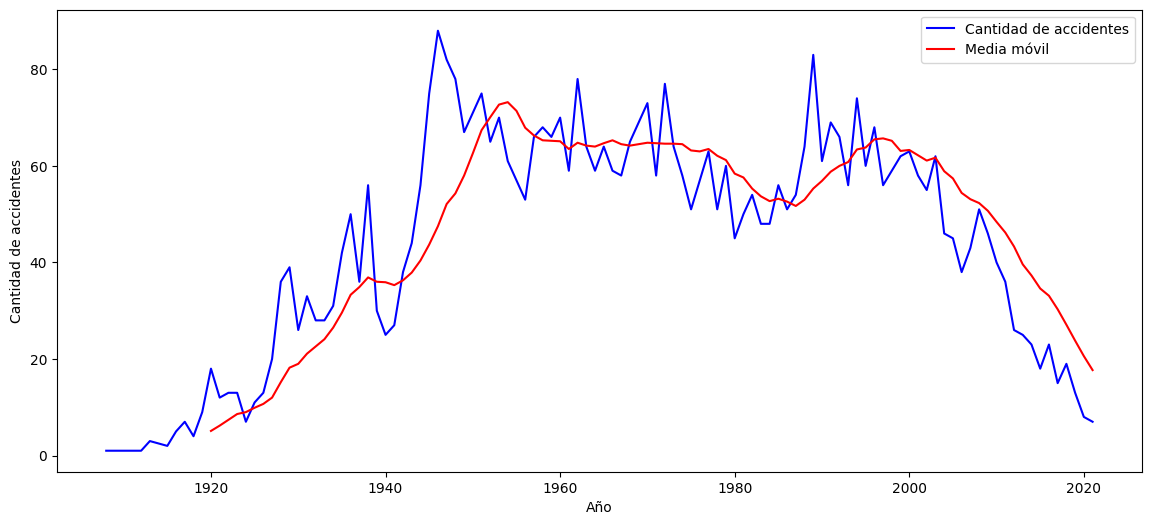

In [70]:
# Creamos el gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=Accidentes_Año, x='Año', y='Cantidad de accidentes', color='blue', label='Cantidad de accidentes')
sns.lineplot(data=Accidentes_Año, x='Año', y='Media móvil', color='red', label='Media móvil')


En la gráfica, podemos interpretar que la cantidad de accidentes que supera la media móvil se corresponde con los años en los que se registraron más accidentes de aeronaves, mientras que aquellos que se encuentran por debajo de la media móvil representan los años con una menor cantidad de accidentes. A partir del año 2000 en adelante, observamos que estamos cumpliendo el objetivo de mantenernos por debajo de la media móvil.